# MILESTONE 2

## I. Introduction

Nama: Nurrahmawati

Batch: FTDS-002

link streamlit https://huggingface.co/spaces/nurrahmawati3/Nurrahmawati-HCK002

> Objektive:

 >In this notebook we are going to analyze a dataset regarding wheather in Australia. The dataset contains, for a number of tuples Date - Location, a collection of columns with weather information about that day in that location. One of that columns is RainTomorrow, indicating whether the following day it rained in that location.

 >Our target will be to build a model to predict whether these RainTomorrow column. The data correspond to several values of Location all across Australia, en we want the predictive model to work fine for each of these values.

 >During this notebook we discuss several aspects of the data, providing some ideas when it comes to exploration and data preprocessing, and testing a couple of classification models.

This data about Rain in Australia, the data extraction from Kaggle in link : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/code 

## II. Import Libraries

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# For Classifier Problems
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTENC

# Evaluate Regression Models
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# Error and Display settings
from sklearn import set_config
set_config(display='diagram')

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

## III. Data Loading

In [2]:
# Load Dataset
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
# Checking Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Based on this information data, we can see that there are two data types here, namely object and float64 types. In addition, it can be seen that only the `Date` and `Location` columns have complete data entries, namely 145460 and in the other columns less than these data entries, it can be estimated that these columns have missing values ​​so we will examine them more carry on.

In [5]:
# Check Percentage Missing Values
data.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
MaxTemp          0.008669
MinTemp          0.010209
Temp9am          0.012148
WindSpeed9am     0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
Rainfall         0.022419
RainToday        0.022419
RainTomorrow     0.022460
Temp3pm          0.024811
WindDir3pm       0.029066
Humidity3pm      0.030984
WindGustSpeed    0.070555
WindGustDir      0.070989
WindDir9am       0.072639
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

As we know that this data has missing values ​​in several columns, the sunshine column has the highest percentage of missing values ​​compared to the others. Handling of missing values ​​in this data will be carried out using a simple imputer in the next session

In [6]:
# Checking data duplicated
data[data.duplicated()].shape

(0, 23)

It can be seen that in the dataset used there is no data duplication in the dataset.

In [7]:
for i in data.columns.tolist():
    print(f'num of unique label in {i}: ', len(data[i].unique()))

num of unique label in Date:  3436
num of unique label in Location:  49
num of unique label in MinTemp:  390
num of unique label in MaxTemp:  506
num of unique label in Rainfall:  682
num of unique label in Evaporation:  359
num of unique label in Sunshine:  146
num of unique label in WindGustDir:  17
num of unique label in WindGustSpeed:  68
num of unique label in WindDir9am:  17
num of unique label in WindDir3pm:  17
num of unique label in WindSpeed9am:  44
num of unique label in WindSpeed3pm:  45
num of unique label in Humidity9am:  102
num of unique label in Humidity3pm:  102
num of unique label in Pressure9am:  547
num of unique label in Pressure3pm:  550
num of unique label in Cloud9am:  11
num of unique label in Cloud3pm:  11
num of unique label in Temp9am:  442
num of unique label in Temp3pm:  503
num of unique label in RainToday:  3
num of unique label in RainTomorrow:  3


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


**Understanding of Datasets**
```txt
Date	      : Date of the observation	
Location      : Location of the weather station   
MinTemp	      : Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree 
                (Degrees Celsius)
MaxTemp	      : Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree	
                (Degrees Celsius)
Rainfall      : Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole 
                millimeter (Millimeters)
Evaporation   : "Class A" pan evaporation in the 24 hours to 9am (Millimeters)
Sunshine      : Bright sunshine in the 24 hours to midnight (Hours)
WindGustDir   : Direction of the strongest wind gust in the 24 hours to midnight (16 compass points)
WindGustSpeed :	Speed of the strongest wind gust in the 24 hours to midnight (Kilometers per hour)
WindDir9am    : Direction of the wind at 9am (16 compass points)
WindDir3pm    : Direction of the wind at 3pm (16 compass points)
WindSpeed9am  : Speed of the wind at 9am (Kilometers per hour)
WindSpeed3pm  : Speed of the wind at 3pm (Kilometers per hour)
Humidity9am   : Relative humidity at 9am (Percent)
Humidity3pm   : Relative humidity at 3pm (Percent)
Pressure9am   : Atmospheric pressure reduced to mean sea level at 9am (Hectopascals)
Pressure3pm   : Atmospheric pressure reduced to mean sea level at 3pm (Hectopascals)
Cloud9am      : Fraction of sky obscured by cloud at 9am (Eighths)
Cloud3pm      : Fraction of sky obscured by cloud at 3pm (Eighths)
Temp9am	      : Temparature at 9am (Degrees Celsius)
Temp3pm	      : Temparature at 3am (Degrees Celsius)
RainToday     : Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am (Binary 
                (0 = No, 1 = Yes))
RainTomorrow  :	Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am (Binary 
                (0 = No, 1 = Yes))
```

In [9]:
min_date = data['Date'].min()
max_date = data['Date'].max()

print(print(f'The timeframe for data collection starts at {min_date} to {max_date}'))

The timeframe for data collection starts at 2007-11-01 to 2017-06-25
None


This data set contains approximately 10 years of daily weather observations from many locations across Australia. Given the large amount of data with around 145 thousand data, we will use data for the last 5 years in this analysis, starting from 2013 to 2017

Based on the general description:
- there is a high missing value
- no duplicate data entry

## IV Data Cleaning

In [10]:
data_clean = data.copy()
data_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
# Change type of Date to datetime
year=pd.to_datetime(data.Date).dt.year

# Make dataset fix for analysis
data_final = data_clean[year > 2012]
data_final.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1431,2013-01-01,Albury,12.1,34.5,0.0,NaN,NaN,W,44.0,SE,W,4.0,22.0,49.0,16.0,1012.8,1009.3,NaN,NaN,22.3,32.7,No,No
1432,2013-01-02,Albury,13.8,33.6,0.0,NaN,NaN,SSE,28.0,SSW,ESE,9.0,11.0,48.0,17.0,1012.2,1010.9,NaN,NaN,21.4,31.2,No,No
1433,2013-01-03,Albury,15.8,36.9,0.0,NaN,NaN,E,22.0,S,SSW,7.0,11.0,32.0,20.0,1015.8,1011.9,NaN,NaN,23.6,33.9,No,No
1434,2013-01-04,Albury,18.6,40.7,0.0,NaN,NaN,ENE,44.0,ESE,N,7.0,24.0,44.0,12.0,1012.3,1008.1,NaN,NaN,27.8,39.3,No,No
1435,2013-01-05,Albury,19.8,43.4,0.0,NaN,NaN,NW,81.0,S,ESE,7.0,11.0,36.0,17.0,1012.4,1009.8,NaN,1.0,30.7,42.4,No,Yes


In [12]:
min_date_final = data_final['Date'].min()
max_date_final = data_final['Date'].max()

print(print(f'The time span of the data to be analyzed starts in {min_date_final} to {max_date_final}'))

The time span of the data to be analyzed starts in 2013-01-01 to 2017-06-25
None


In [13]:
# Checking Basic Information
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78742 entries, 1431 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           78742 non-null  object 
 1   Location       78742 non-null  object 
 2   MinTemp        77805 non-null  float64
 3   MaxTemp        77884 non-null  float64
 4   Rainfall       76709 non-null  float64
 5   Evaporation    39783 non-null  float64
 6   Sunshine       34188 non-null  float64
 7   WindGustDir    74038 non-null  object 
 8   WindGustSpeed  74088 non-null  float64
 9   WindDir9am     73336 non-null  object 
 10  WindDir3pm     76167 non-null  object 
 11  WindSpeed9am   78013 non-null  float64
 12  WindSpeed3pm   76742 non-null  float64
 13  Humidity9am    77353 non-null  float64
 14  Humidity3pm    75384 non-null  float64
 15  Pressure9am    70079 non-null  float64
 16  Pressure3pm    70105 non-null  float64
 17  Cloud9am       46041 non-null  float64
 18  Cl

Based on the information above, we can see that the dataset that will be used is 78742 data entries with 23 columns consisting of 2 data types, namely float64 and object. In addition, we can see data entries in each column that do not have complete data entries which can be interpreted in each of these columns as having missing values.

Based on the explanation between the columns of this dataset, we want to delete the columns `WindDir9am`, `WindDir3pm`, `WindSpeed9am`, `WindSpeed3pm` which are suspected that the information in these columns is already represented by other columns.

In [14]:
# Check Percentage Missing Values
data_final.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
WindSpeed9am     0.009258
MaxTemp          0.010896
Temp9am          0.011341
MinTemp          0.011900
Humidity9am      0.017640
WindSpeed3pm     0.025399
RainToday        0.025818
Rainfall         0.025818
RainTomorrow     0.025907
WindDir3pm       0.032702
Temp3pm          0.035610
Humidity3pm      0.042646
WindGustSpeed    0.059104
WindGustDir      0.059739
WindDir9am       0.068655
Pressure3pm      0.109687
Pressure9am      0.110018
Cloud9am         0.415293
Cloud3pm         0.447880
Evaporation      0.494768
Sunshine         0.565823
dtype: float64

As we can see that each column in this data has a high enough missing value, so we decided that we would not handle missing values ​​using the dropping method. It is feared that the important values ​​contained in this data will be missed or lost too, so we will use the simple imputer method by filling in the missing value with the median or mean value. However, in the RainToday and RainTomorrow columns dropping will be carried out on the missing value because in these columns if done by filling in the mode value it is feared that it will affect the model in predicting targets.

In [15]:
# Handling missing values for RainTomorrow and RainToday
data_final.dropna(subset = ['RainTomorrow','RainToday'],inplace=True)

# Recheck percentage missing values after remove
data_final.loc[:, ['RainTomorrow', 'RainToday']].isnull().sum()

RainTomorrow    0
RainToday       0
dtype: int64

In [16]:
# target encoding
data_final.RainTomorrow.value_counts()

No     59693
Yes    16222
Name: RainTomorrow, dtype: int64

In [17]:
data_final.RainTomorrow.replace({'No': 0, 'Yes': 1}, inplace=True)
data_final.RainTomorrow.value_counts()

0    59693
1    16222
Name: RainTomorrow, dtype: int64

After cleaning the data, we then provide an overview for numerical data and categorical data

In [18]:
num_col = data_final.describe().columns.tolist()
cat_col = data_final.select_dtypes(include=['object']).columns.tolist()

In [19]:
# Categorical overview
for i in data_final[cat_col].columns.tolist():
    print(f'num of unique label in {i}: ', len(data_final[cat_col][i].unique()))

num of unique label in Date:  1609
num of unique label in Location:  49
num of unique label in WindGustDir:  17
num of unique label in WindDir9am:  17
num of unique label in WindDir3pm:  17
num of unique label in RainToday:  2


In [20]:
a = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for i in data_clean[a].columns.tolist():
    print(i, '\n')
    print(data_clean[a][i].value_counts())
    print('-'*30)

WindGustDir 

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64
------------------------------
WindDir9am 

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64
------------------------------
WindDir3pm 

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64
------------------------------
RainToday 

No     110319
Yes     31880
Name: RainToday, dtype: int64
------------------------------


In [21]:
data_final['Location'].value_counts()

MelbourneAirport    1609
Perth               1609
PerthAirport        1609
Darwin              1608
Mildura             1605
Dartmoor            1603
Sydney              1602
Hobart              1601
SydneyAirport       1601
Ballarat            1600
Bendigo             1599
Townsville          1598
Nuriootpa           1598
Portland            1596
MountGinini         1595
Canberra            1594
Woomera             1594
AliceSprings        1594
SalmonGums          1593
Watsonia            1592
Sale                1592
MountGambier        1591
Launceston          1589
Cobar               1589
Albury              1587
Wollongong          1580
Richmond            1579
Tuggeranong         1575
Penrith             1574
Brisbane            1573
Albany              1566
Nhil                1565
Witchcliffe         1560
NorahHead           1560
WaggaWagga          1558
BadgerysCreek       1557
CoffsHarbour        1546
NorfolkIsland       1546
Katherine           1545
Newcastle           1542


In [22]:
# Numerical Overview
data_final[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,75689.0,12.402349,6.418401,-8.2,7.8,12.2,17.0,31.9
MaxTemp,75748.0,23.654698,7.289290,-4.8,18.2,23.1,28.8,47.3
Rainfall,75915.0,2.213505,8.049178,0.0,0.0,0.0,0.6,247.2
Evaporation,38680.0,5.881567,4.661949,0.0,2.8,5.0,8.0,145.0
Sunshine,33142.0,7.734035,3.775510,0.0,5.0,8.6,10.7,14.5
WindGustSpeed,71806.0,39.812383,13.521261,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,75427.0,13.877988,8.783580,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,74137.0,18.496149,8.746498,0.0,13.0,17.0,24.0,83.0
Humidity9am,75234.0,68.564691,19.527640,0.0,56.0,70.0,83.0,100.0
Humidity3pm,73249.0,50.889418,21.165006,0.0,35.0,51.0,65.0,100.0


Based on the results described above, it is known that there are no oddities in the numerical data, such as missing data values ​​99999 etc., so that this data can be processed at a later stage up to modeling.

In [23]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75915 entries, 1431 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           75915 non-null  object 
 1   Location       75915 non-null  object 
 2   MinTemp        75689 non-null  float64
 3   MaxTemp        75748 non-null  float64
 4   Rainfall       75915 non-null  float64
 5   Evaporation    38680 non-null  float64
 6   Sunshine       33142 non-null  float64
 7   WindGustDir    71761 non-null  object 
 8   WindGustSpeed  71806 non-null  float64
 9   WindDir9am     70841 non-null  object 
 10  WindDir3pm     73577 non-null  object 
 11  WindSpeed9am   75427 non-null  float64
 12  WindSpeed3pm   74137 non-null  float64
 13  Humidity9am    75234 non-null  float64
 14  Humidity3pm    73249 non-null  float64
 15  Pressure9am    68008 non-null  float64
 16  Pressure3pm    68005 non-null  float64
 17  Cloud9am       45102 non-null  float64
 18  Cl

## V. EDA for Analysis Purpose

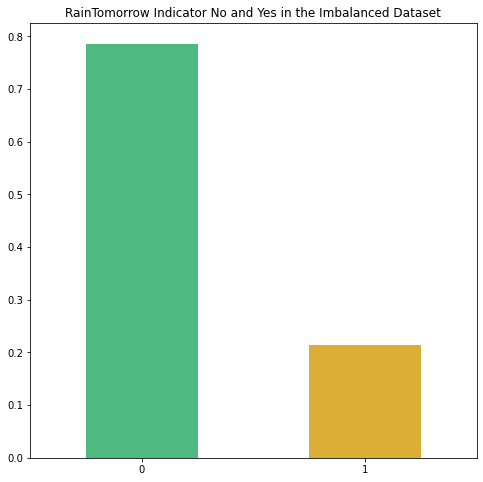

In [24]:
plt.figure(figsize=(8,8))
data_final.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['MediumSeaGreen','Goldenrod'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes in the Imbalanced Dataset')
plt.show()

In [25]:
data_final['RainTomorrow'].value_counts()

0    59693
1    16222
Name: RainTomorrow, dtype: int64

We can observe that the ratio between NO and YES is almost 78:22. So there is a class imbalance and we have to deal with it. We will use the oversampling of the minority class as the size of the data is quite small.

In [28]:
year = [x.split('-')[0] for x in data['Date']]
year_rain_value = {
    "year": year,
    "rain_tommorow": data['RainTomorrow']
}
year_rain_ds = pd.DataFrame(year_rain_value)
rain_yes = year_rain_ds[year_rain_ds['rain_tommorow'] == 'Yes']
rain_no = year_rain_ds[year_rain_ds['rain_tommorow'] == 'No']

fig = go.Figure()

fig.add_trace(go.Bar(x=rain_yes['year'].value_counts().keys(), 
                    y=rain_yes['year'].value_counts(), marker=dict(color='#2D3047'),
                    name='Yes', text=rain_yes['year'].value_counts()))
fig.add_trace(go.Bar(x=rain_no['year'].value_counts().keys(), marker=dict(color='#E84855'),
                    y=rain_no['year'].value_counts(), 
                    name='No'))
fig.update_layout(title="Year vs Rain Tomorrow",  template = "plotly_dark",xaxis=dict(
    title='Year'
), yaxis=dict(
    title='Frequency'
))

Based on this data, we can see that the most rainfall was in 2014 to 2016 and the year with the least rainfall was in 2007.

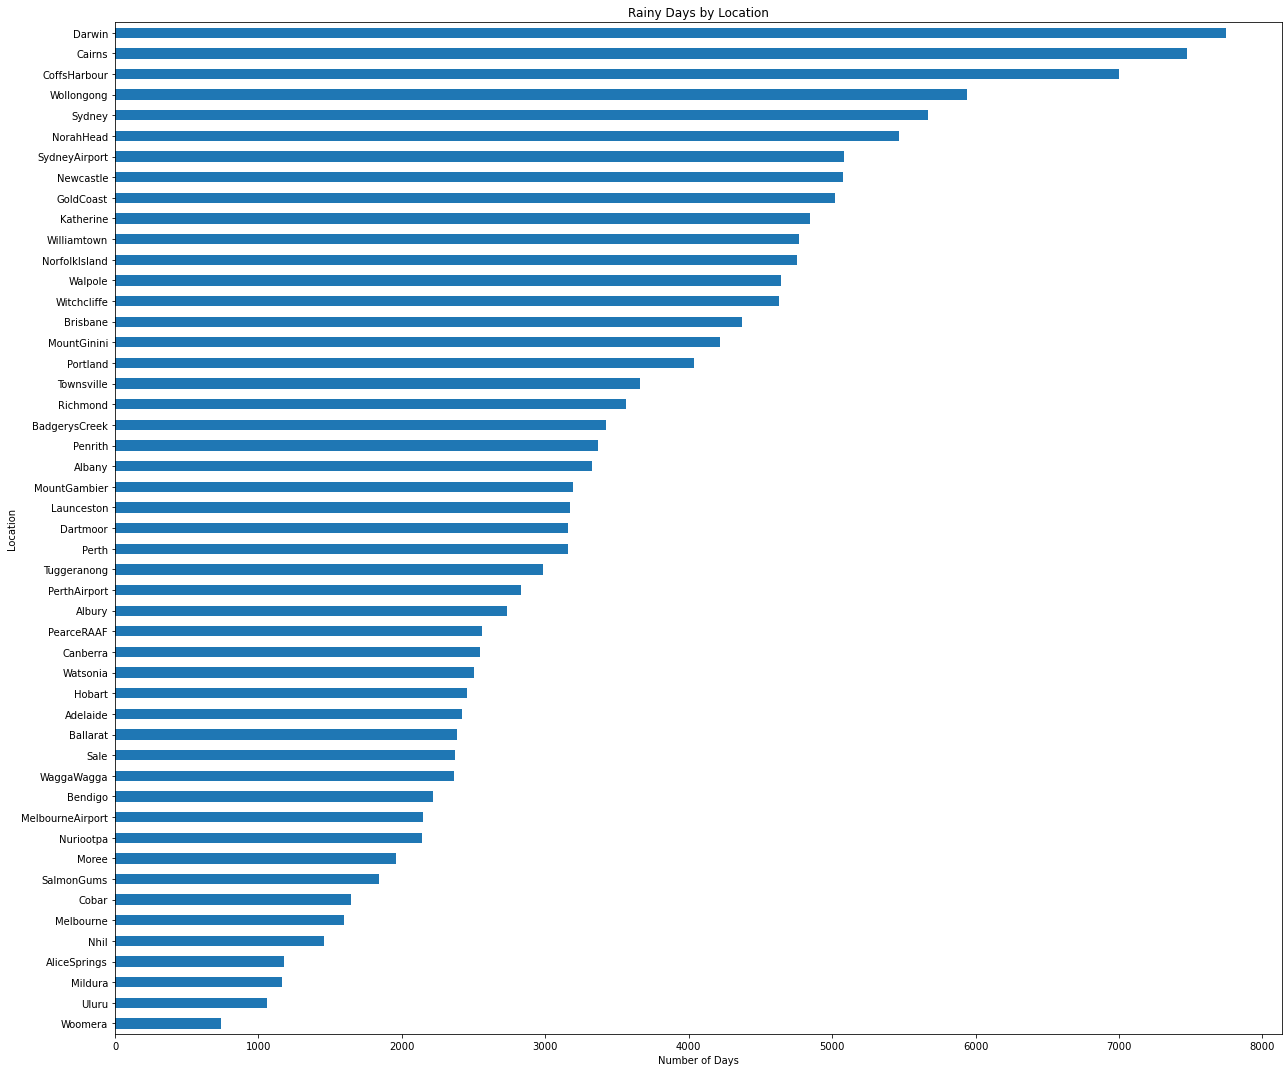

In [41]:
rain_by_loc = data_final.groupby('Location')['Rainfall'].sum().sort_values()
rain_by_loc.plot(kind='barh', figsize=(18,15))
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout();

Based on the visualization above, it can be seen that the Darwin location has the most rainfall compared to other locations in Australia

## VI. Split data into Train and Test

In [ ]:
# Drop column Date
data_final.drop(['Date', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Location'], axis=1, inplace=True)

Separate samples before splitting data for further model inference

In [ ]:
inference = data_final.sample(10, random_state=15)
data_final = data_final.drop(inference.index)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75905 entries, 1431 to 145458
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        75679 non-null  float64
 1   MaxTemp        75738 non-null  float64
 2   Rainfall       75905 non-null  float64
 3   Evaporation    38676 non-null  float64
 4   Sunshine       33137 non-null  float64
 5   WindGustDir    71751 non-null  object 
 6   WindGustSpeed  71796 non-null  float64
 7   Humidity9am    75224 non-null  float64
 8   Humidity3pm    73239 non-null  float64
 9   Pressure9am    67999 non-null  float64
 10  Pressure3pm    67996 non-null  float64
 11  Cloud9am       45098 non-null  float64
 12  Cloud3pm       42534 non-null  float64
 13  Temp9am        75697 non-null  float64
 14  Temp3pm        73774 non-null  float64
 15  RainToday      75905 non-null  object 
 16  RainTomorrow   75905 non-null  int64  
dtypes: float64(14), int64(1), object(2)
memory usa

Deciding between features and targets. It can be seen that in this case the target is in the default column and we can set it as the y variable, whereas other than the default column we can set it to the x variable.

In [ ]:
# define feature and target
X = data_final.drop('RainTomorrow', axis=1)
y = data_final.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(60724, 16)
(15181, 16)
(60724,)
(15181,)


We can see the shape between X and Y of each train and test data. This means that the data distribution is 80% for the train data and 20% for the test data from the cleaned data (`data_final`) so that the train data has the form of 60724 rows and the test data has 15181 rows.

In [ ]:
# for EDA model creation, use dataframe stored in data_eda
df_eda = pd.concat([X_train, y_train], axis=1)
df_eda.shape

(60724, 17)

Recombining from X and Y that we have separated, but the combined ones are for training data only. The data for the test is different when the preprocessing data is derived from the training data

## VII. EDA FOR MODELING

In this case we will use a pipeline in data preprocessing but previously we did the preprocessing manually to make it easier and more precise in using the methods you want to use in the pipeline later

In [ ]:
df_eda.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
13712,16.0,34.7,0.0,9.4,4.8,WSW,83.0,48.0,15.0,1013.4,1007.0,7.0,8.0,24.6,32.5,No,1
137947,9.5,27.0,0.0,6.0,11.2,E,37.0,46.0,21.0,1019.9,1015.8,0.0,1.0,18.4,26.2,No,0
99002,15.1,33.1,0.0,NaN,NaN,E,48.0,63.0,20.0,1007.1,1003.7,NaN,NaN,21.1,31.4,No,1
105325,7.4,16.8,0.8,4.8,8.9,W,46.0,76.0,53.0,1015.7,1014.9,7.0,NaN,11.2,15.3,No,0
26592,18.9,30.7,2.0,NaN,NaN,E,26.0,93.0,53.0,NaN,NaN,NaN,NaN,20.5,28.4,Yes,0


Prior to data preprocessing, we distinguished data based on numeric and categorical so that the steps in data processing could be carried out correctly according to the data group. 

In [ ]:
num_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

cat_col = ['WindGustDir', 'RainToday']

In [ ]:
df_eda[num_col].shape

(60724, 14)

In [ ]:
df_eda[cat_col].shape

(60724, 2)

### **Numerical Feature**

In [ ]:
df_eda[num_col].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
13712,16.0,34.7,0.0,9.4,4.8,83.0,48.0,15.0,1013.4,1007.0,7.0,8.0,24.6,32.5
137947,9.5,27.0,0.0,6.0,11.2,37.0,46.0,21.0,1019.9,1015.8,0.0,1.0,18.4,26.2
99002,15.1,33.1,0.0,NaN,NaN,48.0,63.0,20.0,1007.1,1003.7,NaN,NaN,21.1,31.4
105325,7.4,16.8,0.8,4.8,8.9,46.0,76.0,53.0,1015.7,1014.9,7.0,NaN,11.2,15.3
26592,18.9,30.7,2.0,NaN,NaN,26.0,93.0,53.0,NaN,NaN,NaN,NaN,20.5,28.4


In this numerical feature, we will first check the outliers from each column and then handle the outliers

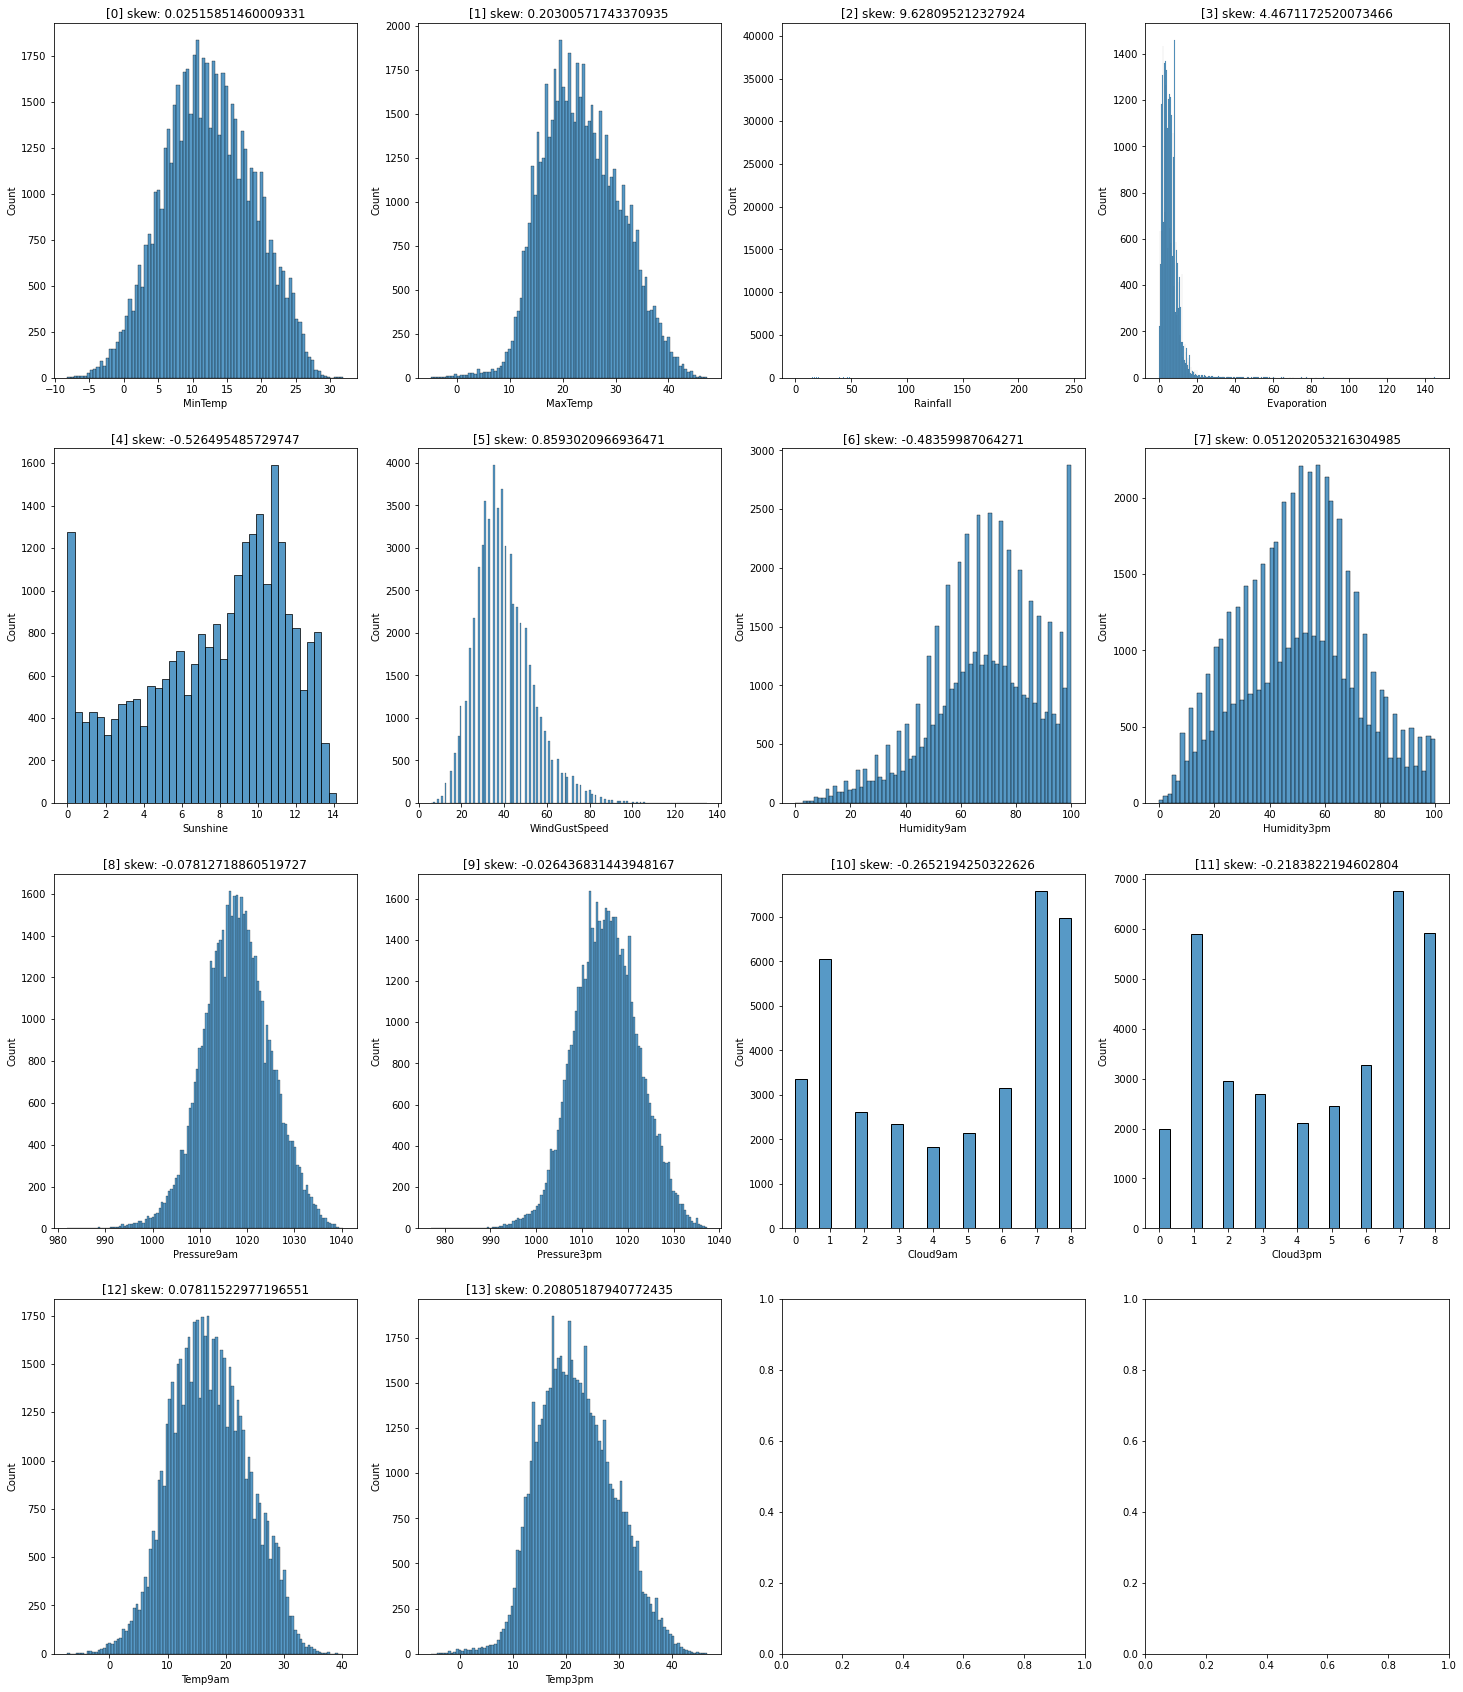

In [ ]:
fig, ax = plt.subplots(ncols=4,nrows=4, figsize=[25,30])
ax = ax.flatten()

for idx, col in enumerate(df_eda[num_col]):
    sns.histplot(df_eda[num_col][col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {df_eda[num_col][col].skew()}')

In [ ]:
def outlier_analysis(df_eda,col):
  skewness = df_eda[num_col][col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = df_eda[num_col][col].mean() + 3*df_eda[num_col][col].std()
    lower = df_eda[num_col][col].mean() - 3*df_eda[num_col][col].std()
  else:
    Q1 = df_eda[num_col][col].quantile(0.25)
    Q3 = df_eda[num_col][col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (1.5*IQR)
    lower = Q3 - (1.5*IQR)
  
  no_outliers = df_eda[num_col][(df_eda[num_col][col]>=lower) & (df_eda[num_col][col]<=upper)]
  outliers = df_eda[num_col][(df_eda[num_col][col]<lower) | (df_eda[num_col][col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/df_eda.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(df_eda[num_col].columns):
  outlier_analysis(df_eda[num_col],i)

percentage outlier from MinTemp : 0.02634872538040972 %
percentage outlier from MaxTemp : 0.1745603056452144 %
percentage outlier from Rainfall : 1.6764376523285687 %
percentage outlier from Evaporation : 0.5368552796258481 %
percentage outlier from Sunshine : 0.0 %
percentage outlier from WindGustSpeed : 0.8909162769251038 %
percentage outlier from Humidity9am : 0.306303932547263 %
percentage outlier from Humidity3pm : 0.0 %
percentage outlier from Pressure9am : 0.3194782952374679 %
percentage outlier from Pressure3pm : 0.24207891443251434 %
percentage outlier from Cloud9am : 0.0 %
percentage outlier from Cloud3pm : 0.0 %
percentage outlier from Temp9am : 0.09880772017653645 %
percentage outlier from Temp3pm : 0.2404321190962387 %


Based on the analysis above, we can see that each column of the numeric feature on average has a normal distribution, so we will handle the outliers of these features by using the gaussian capping_method.

In [ ]:
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, missing_values='ignore', variables=['MinTemp', 'MaxTemp', 
                                                                                'Rainfall', 'Evaporation', 'WindGustSpeed', 
                                                                                'Humidity9am', 'Pressure9am', 'Pressure3pm', 
                                                                                'Temp9am', 'Temp3pm'])

df_eda = wins.fit_transform(df_eda)
df_eda.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,60546.000000,60592.000000,60724.000000,30942.000000,26516.000000,57448.000000,60177.000000,58561.000000,54383.000000,54371.000000,36055.00000,34068.000000,60567.000000,59004.000000,60724.000000
mean,12.397198,23.650617,1.843749,5.743116,7.726177,39.712227,68.626143,50.896450,1017.792002,1015.350651,4.55432,4.547845,17.236654,22.042644,0.213705
std,6.417035,7.277923,4.934715,3.832357,3.766553,13.218160,19.510930,21.165921,7.058771,7.016024,2.90696,2.765452,6.577764,7.098909,0.409924
min,-6.854918,1.784641,0.000000,0.000000,0.000000,6.000000,10.013021,0.000000,996.487257,994.212678,0.00000,0.000000,-2.508562,0.706784,0.000000
25%,7.800000,18.200000,0.000000,2.800000,5.000000,31.000000,56.000000,35.000000,1013.100000,1010.500000,1.00000,2.000000,12.500000,16.800000,0.000000
50%,12.200000,23.100000,0.000000,5.000000,8.600000,39.000000,70.000000,51.000000,1017.700000,1015.300000,5.00000,5.000000,17.000000,21.500000,0.000000
75%,17.000000,28.800000,0.600000,7.800000,10.700000,48.000000,83.000000,65.000000,1022.500000,1020.100000,7.00000,7.000000,21.800000,26.900000,0.000000
max,31.649107,45.511414,26.676945,19.931572,14.500000,80.301327,100.000000,100.000000,1039.074220,1036.473118,8.00000,8.000000,36.980591,43.373241,1.000000


**Missing value handling on numerical**

In [ ]:
df_eda[num_col].isnull().sum()

MinTemp            178
MaxTemp            132
Rainfall             0
Evaporation      29782
Sunshine         34208
WindGustSpeed     3276
Humidity9am        547
Humidity3pm       2163
Pressure9am       6341
Pressure3pm       6353
Cloud9am         24669
Cloud3pm         26656
Temp9am            157
Temp3pm           1720
dtype: int64

As we already know that this data has a missing value, so it is necessary to handle the missing value for this data. Based on the distribution of this data, the average has a normal distribution, so we will handle missing values ​​using a simple imputer by filling in the missing value with an mean.

In [ ]:
imp_num = SimpleImputer(strategy='mean')

df_eda[num_col] = imp_num.fit_transform(df_eda[num_col])
df_eda[num_col].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Based on the statistics below, we can see the mean value used to fill in the blank values ​​in each column.

In [ ]:
imp_num.statistics_

array([  12.39719766,   23.65061692,    1.84374927,    5.74311591,
          7.72617665,   39.71222702,   68.62614324,   50.89644986,
       1017.79200209, 1015.35065069,    4.55431979,    4.54784549,
         17.23665383,   22.04264372])

In [ ]:
df_eda[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,60724.0,12.397198,6.407623,-6.854918,7.800000,12.200000,17.000000,31.649107
MaxTemp,60724.0,23.650617,7.270008,1.784641,18.200000,23.200000,28.800000,45.511414
Rainfall,60724.0,1.843749,4.934715,0.000000,0.000000,0.000000,0.600000,26.676945
Evaporation,60724.0,5.743116,2.735625,0.000000,5.000000,5.743116,5.743116,19.931572
Sunshine,60724.0,7.726177,2.488933,0.000000,7.726177,7.726177,7.726177,14.500000
WindGustSpeed,60724.0,39.712227,12.856658,6.000000,31.000000,39.000000,46.000000,80.301327
Humidity9am,60724.0,68.626143,19.422853,10.013021,57.000000,69.000000,83.000000,100.000000
Humidity3pm,60724.0,50.896450,20.785530,0.000000,36.000000,50.896450,65.000000,100.000000
Pressure9am,60724.0,1017.792002,6.680055,996.487257,1013.700000,1017.792002,1021.800000,1039.074220
Pressure3pm,60724.0,1015.350651,6.638869,994.212678,1011.100000,1015.350651,1019.400000,1036.473118


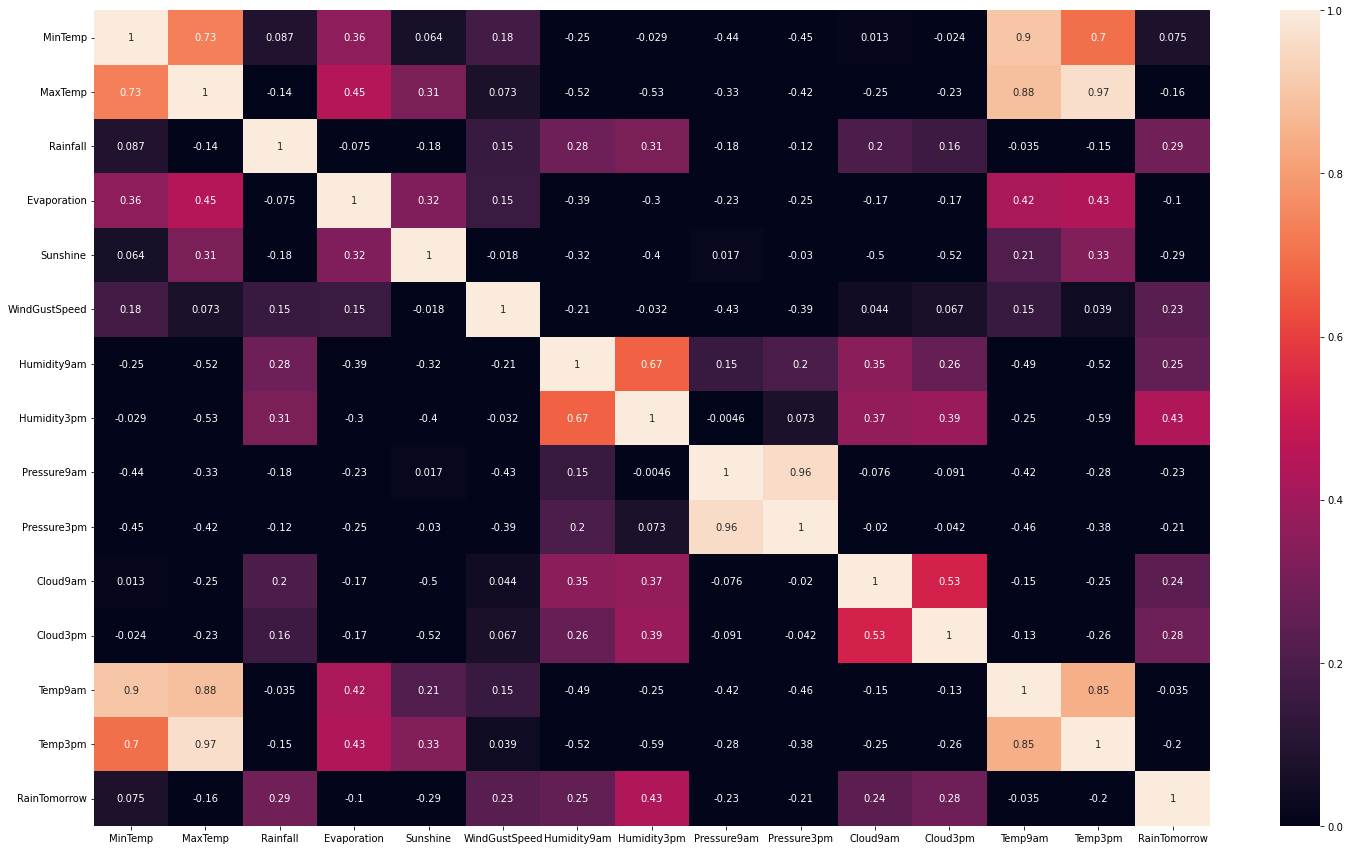

In [ ]:
fig,ax = plt.subplots(figsize=[25,15])

corr = df_eda[num_col + ['RainTomorrow']].corr()

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

Based on this heatmap correlation, we can perform feature selection on numerical features. Here we use a feature that has a correlation coefficient between targets and features with a threshold of 0.2 so the features we will use are `Rainfall`, `WindGustSpeed`, `Humidity3pm`, `Cloud9am`, `Cloud3pm`, `Pressure3pm`, ` Pressure9am`, `Sunshine`

In [ ]:
num_selection = ['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'Sunshine']
df_eda[num_selection].head()

,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,Cloud3pm,Pressure3pm,Pressure9am,Sunshine
13712,0.0,80.301327,15.0,7.00000,8.000000,1007.000000,1013.400000,4.800000
137947,0.0,37.000000,21.0,0.00000,1.000000,1015.800000,1019.900000,11.200000
99002,0.0,48.000000,20.0,4.55432,4.547845,1003.700000,1007.100000,7.726177
105325,0.8,46.000000,53.0,7.00000,4.547845,1014.900000,1015.700000,8.900000
26592,2.0,26.000000,53.0,4.55432,4.547845,1015.350651,1017.792002,7.726177


In [ ]:
df_eda[num_selection].describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall,60724.0,1.843749,4.934715,0.000000,0.000000,0.000000,0.600000,26.676945
WindGustSpeed,60724.0,39.712227,12.856658,6.000000,31.000000,39.000000,46.000000,80.301327
Humidity3pm,60724.0,50.896450,20.785530,0.000000,36.000000,50.896450,65.000000,100.000000
Cloud9am,60724.0,4.554320,2.239955,0.000000,4.000000,4.554320,6.000000,8.000000
Cloud3pm,60724.0,4.547845,2.071364,0.000000,4.000000,4.547845,6.000000,8.000000
Pressure3pm,60724.0,1015.350651,6.638869,994.212678,1011.100000,1015.350651,1019.400000,1036.473118
Pressure9am,60724.0,1017.792002,6.680055,996.487257,1013.700000,1017.792002,1021.800000,1039.074220
Sunshine,60724.0,7.726177,2.488933,0.000000,7.726177,7.726177,7.726177,14.500000


**scaling features numeric**

In [ ]:
norm = 0
nonorm = 0
for col in df_eda[['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'Sunshine']]:
  if df_eda[col].skew() >=-0.5 and df_eda[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

StandardScaler()

In [ ]:
# numerical scaling
num_col_scalling = ['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'Sunshine']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_eda[num_col_scalling]))
num_scaled.columns = num_col_scalling

df_eda.drop(num_col_scalling, axis=1, inplace=True)
df_eda = pd.concat([df_eda.reset_index(drop=True), num_scaled], axis=1)

df_eda_num = df_eda[['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'Sunshine']]
df_eda_num.head()

,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,Cloud3pm,Pressure3pm,Pressure9am,Sunshine
0,-0.373631,3.157075,-1.727007,1.091853,1.666623,-1.257853e+00,-0.657485,-1.175685e+00
1,-0.373631,-0.210961,-1.438342,-2.033236,-1.712820,6.768518e-02,0.315569,1.395719e+00
2,-0.373631,0.644634,-1.486453,0.000000,0.000000,-1.754929e+00,-1.600599,-3.568540e-16
3,-0.211513,0.489071,0.101203,1.091853,0.000000,-6.788120e-02,-0.313174,4.716209e-01
4,0.031664,-1.066556,0.101203,0.000000,0.000000,-3.424914e-14,0.000000,-3.568540e-16


### **Categorical Feature**

After we have made feature selection for numeric data, we will focus on categorical data preprocessing

In [ ]:
df_eda[cat_col].isnull().sum()

WindGustDir    3314
RainToday         0
dtype: int64

In this categorical data there is a missing value so we will handle the missing value using a simple imputer as well but the strategy uses the most frequent of the data

In [ ]:
# missing value handling
imp_cat = SimpleImputer(strategy='most_frequent')
df_eda[cat_col] = imp_cat.fit_transform(df_eda[cat_col])

imp_cat.statistics_

array(['W', 'No'], dtype=object)

In [ ]:
df_eda[cat_col].isnull().sum()

WindGustDir    0
RainToday      0
dtype: int64

In this categorical data I will do the encoding by means of OneHotEncoder with OrdinalEncoder

One Hot Encoder for `WindGustDir` feature

In [ ]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_eda[['WindGustDir']]))
cat_ohe.columns = ohe_enc.get_feature_names(['WindGustDir'])

cat_ohe.head()

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ordinal Encoder for `RainToday` feature

In [ ]:
RainToday = ['No', 'Yes']

ord_enc = OrdinalEncoder(categories=[RainToday])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda[['RainToday']]))

cat_ord.columns = ['RainToday']
review = pd.concat([df_eda[['RainToday']].reset_index(drop=True), cat_ord], axis=1)

review.head()

,RainToday,RainToday
0,No,0.0
1,No,0.0
2,No,0.0
3,No,0.0
4,Yes,1.0


After encoding based on 2 different methods, we combine them back into the `data_cat` variable

In [ ]:
data_cat = pd.concat([cat_ohe, cat_ord, df_eda['RainTomorrow'].reset_index(drop=True)], axis=1)
data_cat.head()

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday,RainTomorrow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


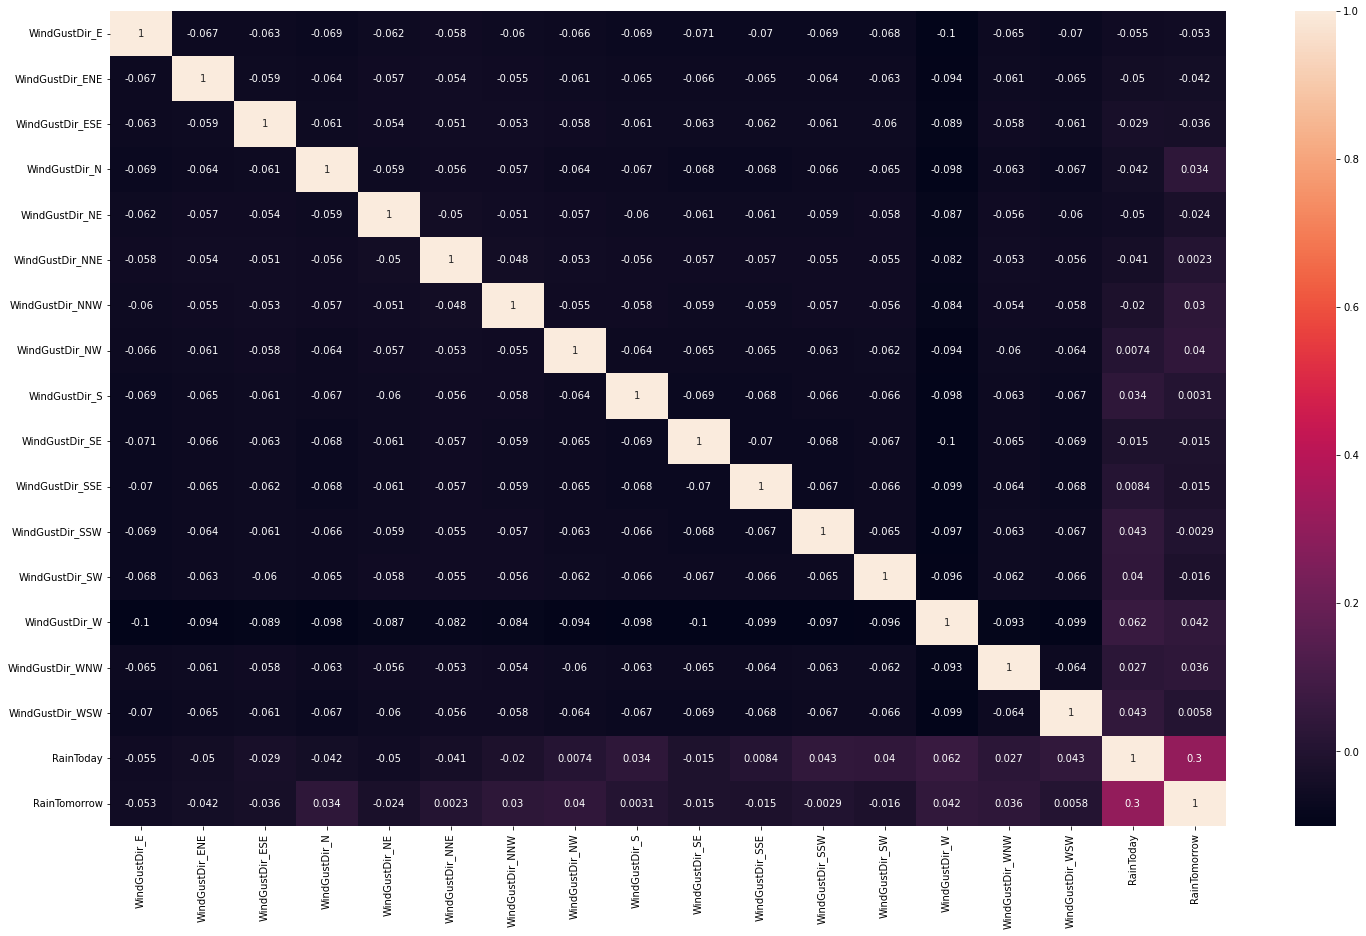

In [ ]:
fig,ax = plt.subplots(figsize=[25,15])

corr = data_cat.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Based on the results above, the categorical feature that we choose is only the `RainToday` feature because when compared to other features, the Raintoday feature has the highest correlation value to the target.

In [ ]:
df_eda_cat = data_cat[['RainToday']]
df_eda_cat.head()

,RainToday
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [ ]:
data_eda = pd.concat([df_eda_num.reset_index(drop=True), df_eda_cat.reset_index(drop=True), df_eda['RainTomorrow'].reset_index(drop=True)], axis=1)
data_eda.head()

,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,Cloud3pm,Pressure3pm,Pressure9am,Sunshine,RainToday,RainTomorrow
0,-0.373631,3.157075,-1.727007,1.091853,1.666623,-1.257853e+00,-0.657485,-1.175685e+00,0.0,1
1,-0.373631,-0.210961,-1.438342,-2.033236,-1.712820,6.768518e-02,0.315569,1.395719e+00,0.0,0
2,-0.373631,0.644634,-1.486453,0.000000,0.000000,-1.754929e+00,-1.600599,-3.568540e-16,0.0,1
3,-0.211513,0.489071,0.101203,1.091853,0.000000,-6.788120e-02,-0.313174,4.716209e-01,0.0,0
4,0.031664,-1.066556,0.101203,0.000000,0.000000,-3.424914e-14,0.000000,-3.568540e-16,1.0,0


Overall what we did to train data preprocess:
- For Numeric:
1. Outlier Handling
2. Missing value imputer using mean
3. Scaling using Standard Scaler
4. Feature selection `Rainfall`, `WindGustSpeed`, `Humidity3pm`, `Cloud9am`, `Cloud3pm`, `Pressure3pm`, `Pressure9am`, `Sunshine`

- For categoric:
1. Missing value handling
2. ordinal encoding for RainToday
3. OHE for WindGustDir
4. Feature selection `RainToday`

## **Preprocess**

**without imbalance handling**

In [ ]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3, missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'Sunshine']])
num_tr

array([[-3.73631369e-01,  3.15707514e+00, -1.72700653e+00, ...,
        -1.25785274e+00, -6.57485296e-01, -1.17568466e+00],
       [-3.73631369e-01, -2.10960688e-01, -1.43834180e+00, ...,
         6.76851764e-02,  3.15568527e-01,  1.39571917e+00],
       [-3.73631369e-01,  6.44634199e-01, -1.48645259e+00, ...,
        -1.75492946e+00, -1.60059900e+00, -3.56853967e-16],
       ...,
       [ 3.96429521e-01,  8.00196905e-01,  5.34200561e-01, ...,
         1.21246792e+00,  1.33353253e+00, -3.56853967e-16],
       [-3.33101848e-01,  1.34466638e+00,  2.07374582e+00, ...,
        -1.00178291e+00, -1.51077865e+00, -3.56853967e-16],
       [-3.73631369e-01,  2.55727432e-01,  1.06341924e+00, ...,
         4.14132586e-01, -5.52694885e-01, -1.37657559e+00]])

In [ ]:
cat_pipeline = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories=[['No', 'Yes']])) #RainToday
    ])

cat_tr = cat_pipeline.fit_transform(X_train[['RainToday']])
cat_tr

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'Sunshine']),
        ("cat", cat_pipeline, ['RainToday'])
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr

array([[-3.73631369e-01,  3.15707514e+00, -1.72700653e+00, ...,
        -6.57485296e-01, -1.17568466e+00,  0.00000000e+00],
       [-3.73631369e-01, -2.10960688e-01, -1.43834180e+00, ...,
         3.15568527e-01,  1.39571917e+00,  0.00000000e+00],
       [-3.73631369e-01,  6.44634199e-01, -1.48645259e+00, ...,
        -1.60059900e+00, -3.56853967e-16,  0.00000000e+00],
       ...,
       [ 3.96429521e-01,  8.00196905e-01,  5.34200561e-01, ...,
         1.33353253e+00, -3.56853967e-16,  1.00000000e+00],
       [-3.33101848e-01,  1.34466638e+00,  2.07374582e+00, ...,
        -1.51077865e+00, -3.56853967e-16,  0.00000000e+00],
       [-3.73631369e-01,  2.55727432e-01,  1.06341924e+00, ...,
        -5.52694885e-01, -1.37657559e+00,  0.00000000e+00]])

In [ ]:
train_manual = np.array(data_eda[['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'Sunshine', 'RainToday']])

np.allclose(train_tr, train_manual)

True

Based on the analysis above, we can see the proof of the process between the manual and pipeline methods, from the results above it says 'True' which means it is appropriate and there is no difference between the two preprocessing methods.

In [ ]:
num = ['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'Sunshine']
cat = ['RainToday']

no_imb = pd.DataFrame(full_pipeline.fit_transform(X_train), columns= num +cat)

pd.concat([no_imb, y_train.reset_index(drop=True)], axis=1)

,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,Cloud3pm,Pressure3pm,Pressure9am,Sunshine,RainToday,RainTomorrow
0,-0.373631,3.157075e+00,-1.727007,1.091853,1.666623,-1.257853e+00,-0.657485,-1.175685e+00,0.0,1
1,-0.373631,-2.109607e-01,-1.438342,-2.033236,-1.712820,6.768518e-02,0.315569,1.395719e+00,0.0,0
2,-0.373631,6.446342e-01,-1.486453,0.000000,0.000000,-1.754929e+00,-1.600599,-3.568540e-16,0.0,1
3,-0.211513,4.890715e-01,0.101203,1.091853,0.000000,-6.788120e-02,-0.313174,4.716209e-01,0.0,0
4,0.031664,-1.066556e+00,0.101203,0.000000,0.000000,-3.424914e-14,0.000000,-3.568540e-16,1.0,0
...,...,...,...,...,...,...,...,...,...,...
60719,-0.373631,-5.526698e-16,0.245536,-0.693913,-0.747265,5.798248e-01,-0.088623,1.275185e+00,0.0,0
60720,-0.373631,-9.109929e-01,0.293647,1.538294,0.701068,5.496990e-01,0.405389,-3.568540e-16,0.0,0
60721,0.396430,8.001969e-01,0.534201,0.000000,0.000000,1.212468e+00,1.333533,-3.568540e-16,1.0,1
60722,-0.333102,1.344666e+00,2.073746,1.538294,1.666623,-1.001783e+00,-1.510779,-3.568540e-16,0.0,1


In [ ]:
df_eda['RainTomorrow'].value_counts()

0    47747
1    12977
Name: RainTomorrow, dtype: int64

We need to know about this process with imbalanced data, so we will compare the model prediction results on imbalanced data with handling imbalance

**With handling imbalance**

In [ ]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3, missing_values='ignore')),
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories=[['No', 'Yes']])) #RainToday
    ])

final_prep = ColumnTransformer([
        ("num", num_pipeline, num),
        ("cat", cat_pipeline, cat)
    ])

# imbalance pipeline
final = imbpipe([
            ('preprocess', final_prep),
            ('over_sampl', SMOTENC([8], sampling_strategy=1.0, random_state=0))
])

final

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(missing_values='ignore',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindGustSpeed',
                                                   'Humidity3pm', 'Cloud9am',
                                                   'Cloud3pm', 'Pressure3pm',
                                                   'Pressure9am', 'Sunshine']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes']]))]),
                                                  ['RainToday'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[8], random_state=0,
                         sampling_strategy=1.0))])

In [ ]:
X_resampled, y_resampled = final.fit_resample(X_train, y_train)

resampled = pd.concat([pd.DataFrame(X_resampled, columns=num+cat), pd.DataFrame(y_resampled)], axis=1)
resampled

,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,Cloud3pm,Pressure3pm,Pressure9am,Sunshine,RainToday,RainTomorrow
0,-0.373631,3.157075,-1.727007,1.091853,1.666623,-1.257853e+00,-0.657485,-1.175685e+00,0.0,1
1,-0.373631,-0.210961,-1.438342,-2.033236,-1.712820,6.768518e-02,0.315569,1.395719e+00,0.0,0
2,-0.373631,0.644634,-1.486453,0.000000,0.000000,-1.754929e+00,-1.600599,-3.568540e-16,0.0,1
3,-0.211513,0.489071,0.101203,1.091853,0.000000,-6.788120e-02,-0.313174,4.716209e-01,0.0,0
4,0.031664,-1.066556,0.101203,0.000000,0.000000,-3.424914e-14,0.000000,-3.568540e-16,1.0,0
...,...,...,...,...,...,...,...,...,...,...
95489,-0.373631,2.052585,0.635300,-0.311778,-0.118835,-8.245316e-01,-0.406685,-1.491434e-01,0.0,1
95490,1.609517,0.800197,0.639193,0.000000,0.000000,-9.288406e-01,-1.235859,-3.568540e-16,1.0,1
95491,2.122988,0.216842,1.159635,1.091853,0.701068,-2.682184e-01,-0.223357,-1.428803e+00,1.0,1
95492,-0.373631,1.161871,0.262380,0.000000,0.000000,1.545803e+00,1.046409,-3.568540e-16,0.0,1


In [ ]:
resampled.RainTomorrow.value_counts()

1    47747
0    47747
Name: RainTomorrow, dtype: int64

Based on the process above, we can see that in this data imbalance handling has been carried out using the SMOTENC method so that the samples between category 0 and 1 are balanced.

In [ ]:
test_tr = final_prep.transform(X_test)
test_tr

array([[-3.73631369e-01,  2.55727432e-01,  3.89868193e-01, ...,
         1.21377206e+00,  1.19482824e+00,  0.00000000e+00],
       [-3.73631369e-01, -6.77648809e-01, -9.09123117e-01, ...,
        -2.23353590e-01,  1.07429369e+00,  0.00000000e+00],
       [-3.73631369e-01, -6.77648809e-01, -9.12396994e-02, ...,
         3.11374095e-02,  5.51977285e-01,  0.00000000e+00],
       ...,
       [ 1.81496274e+00,  1.26688503e+00,  1.40019477e+00, ...,
         1.04910141e+00, -3.56853967e-16,  1.00000000e+00],
       [-3.73631369e-01, -9.10992869e-01,  7.74754508e-01, ...,
        -1.27125771e+00, -3.56853967e-16,  0.00000000e+00],
       [-3.73631369e-01, -2.10960688e-01, -4.76126014e-01, ...,
         1.12395170e+00, -3.56853967e-16,  0.00000000e+00]])

## VIII. Model Definition, Training, & hyperparameter tuning

In this modeling, several models will be created, such as logistic regression models, SVM models, decision tree models, and randomforest models

In [ ]:
# Defining Logistic Regression Model
log_model = LogisticRegression()
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()

# training model
for model in [log_model,svm_model,dt_model,rf_model]:
    model.fit(train_tr, y_train)

In [ ]:
# checking cross validation score
cv_log_model = cross_val_score(log_model, train_tr, y_train, cv=3, scoring="recall")
cv_svm_model = cross_val_score(svm_model, train_tr, y_train, cv=3, scoring="recall")
cv_dt_model = cross_val_score(dt_model, train_tr, y_train, cv=3, scoring="recall")
cv_rf_model = cross_val_score(rf_model, train_tr, y_train, cv=3, scoring="recall")
cvh=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model],['log_model','svm_model','dt_model','rf_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)

log_model
recall - All - Cross Validation  :  [0.46994914 0.47387887 0.4649711 ]
recall - Mean - Cross Validation :  0.4695997049698155
recall - Std - Cross Validation  :  0.0036449681335232057
recall - Range of Test-Set       :  0.4659547368362923 - 0.47324467310333873
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.41701341 0.42995839 0.42104046]
recall - Mean - Cross Validation :  0.4226707536186183
recall - Std - Cross Validation  :  0.0054090380255231475
recall - Range of Test-Set       :  0.4172617155930951 - 0.42807979164414145
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.51178918 0.52427184 0.50820809]
recall - Mean - Cross Validation :  0.5147563729459459
recall - Std - Cross Validation  :  0.006885453334618007
recall - Range of Test-Set       :  0.5078709196113279 - 0.5216418262805639
--------------------------------------------------
rf_model
recall - All - Cross Validat

In [ ]:
mean = []
std = []
for i in [cv_log_model, cv_svm_model, cv_dt_model, cv_rf_model]:
    mean.append(i.mean())
    std.append(i.std())

model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
bestmodel = pd.DataFrame(model)
bestmodel['mean']=np.round(mean, 2)
bestmodel['std']=np.round(std, 4)
bestmodel.rename(columns={0:'Model'}, inplace=True)

bestmodel.sort_values(by= 'mean' , ascending = False).reset_index(drop=True)

,Model,mean,std
0,Decision Tree,0.51,0.0069
1,Random Forest,0.49,0.0037
2,Logistic Regression,0.47,0.0036
3,SVM,0.42,0.0054


Of the four models above, we can determine the best model for predicting whether it will rain tomorrow or not by using a cross validation comparison. When compared based on mean cross validation, the highest average is in the DecisionTree model, but if we review it again with the standard deviation, where the smaller the standard deviation value, the range between the data is not too different and more consistent with the data, so we can conclude that `Logistic Regression model` is the best model in predicting this data because the Logistic Regression model has the smallest standard deviation value but the average value of the cross validation is not too far from the DecisionTree model.

After we determine the best model of the four models, then we will do hyperparameter tuning so that the model can predict very well according to our expectations.

In [ ]:
# defining hyperparameters for tuning
params = [{
            'C': np.logspace(-4, 4, 20), 
            'penalty': ['none', 'l1', 'l2', 'elasticnent'],
            'solver': ['newton-cg','lbfgs','liblinear','sag', 'saga']
    }]

# Training using grid search
grid_search = GridSearchCV(log_model, params, cv=3,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['none', 'l1', 'l2', 'elasticnent'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='recall')

In [ ]:
grid_search.best_params_

{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
grid_search.best_score_

0.5051241718978404

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=0.0001, solver='liblinear')

**without imbalance handling**

In [ ]:
model = grid_search.best_estimator_

model.fit(train_tr, y_train)

model_train = model.predict(train_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     47747
           1       0.66      0.49      0.56     12977

    accuracy                           0.84     60724
   macro avg       0.76      0.71      0.73     60724
weighted avg       0.82      0.84      0.83     60724

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11937
           1       0.66      0.49      0.56      3244

    accuracy                           0.84     15181
   macro avg       0.76      0.71      0.73     15181
weighted avg       0.82      0.84      0.83     15181



The results above are the results of the prediction model from the data analyzed which are imbalance data. Regarding the data we are analyzing here, we want to minimize errors in predictions, that is, if the model predicts that it will not rain, in reality it will rain tomorrow. These predictions must be minimized so that errors do not occur which can cause losses at that location, such as important agendas being hindered by errors in these predictions. To reduce these predictions, the recall evaluation value must be close to 1 so that fatal errors do not occur as previously mentioned. In the classification report above, it is known that the recall value in the Logistic Regression model with the selected hyperparameter is 49%, meaning that the model is still not good at predicting class 1 because this data is still imbalanced and class 1 is a minority class.

**With handling imbalance**

In [ ]:
# preprocessing+model
# Logistic Regression Model
final_log_bal = imbpipe([
            ('preprocess', final_prep),
            ('over_sampl', SMOTENC([8], sampling_strategy=1.0, random_state=0)),
            ('model', model)
])

final_log_bal

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(missing_values='ignore',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindGustSpeed',
                                                   'Humidity3pm', 'Cloud9am',
                                                   'Cloud3pm', 'Pressure3pm',
                                                   'Pressure9am', 'Sunshine']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes']]))]),
                                                  ['RainToday'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[8], random_state=0,
                         sampling_strategy=1.0)),
                ('model', LogisticRegression(C=0.0001, solver='liblinear'))])

In [ ]:
final_log_bal.fit(X_train, y_train)

lr_train_ = final_log_bal.predict(X_train)
lr_test_ = final_log_bal.predict(X_test)

print(classification_report(y_train, lr_train_))
print(classification_report(y_test, lr_test_))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83     47747
           1       0.46      0.79      0.59     12977

    accuracy                           0.76     60724
   macro avg       0.70      0.77      0.71     60724
weighted avg       0.83      0.76      0.78     60724

              precision    recall  f1-score   support

           0       0.93      0.75      0.83     11937
           1       0.46      0.79      0.58      3244

    accuracy                           0.76     15181
   macro avg       0.69      0.77      0.70     15181
weighted avg       0.83      0.76      0.78     15181



This analysis is the result of a classification report from data that has been handled by imbalance. There are differences in the results between imbalance data and data that has been handled by imbalance. In this result, the recall value is shown to be much better than the recall value in the imbalance data of 79% so that we can conclude that the model predicted in this data balance is considered good at predicting whether it will rain tomorrow or not

### **Combine Pipeline: Preprocess + Model**

In [ ]:
final_prep

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(missing_values='ignore',
                                                             tail='both')),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Rainfall', 'WindGustSpeed', 'Humidity3pm',
                                  'Cloud9am', 'Cloud3pm', 'Pressure3pm',
                                  'Pressure9am', 'Sunshine']),
                                ('cat',
                                 Pipeline(steps=[('imputer_1',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_enc',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes']]))]),
                                 ['RainToday'])])

In [ ]:
all_process = imbpipe([
            ('preprocess', final_prep),
            ('over_sampl', SMOTENC([8], sampling_strategy=1.0, random_state=0)),
            ('classification', model)
            ])

all_process.fit(X_train, y_train)
hasil_train = all_process.predict(X_train)
hasil_test = all_process.predict(X_test)

print(classification_report(y_train, hasil_train))
print(classification_report(y_test, hasil_test))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83     47747
           1       0.46      0.79      0.59     12977

    accuracy                           0.76     60724
   macro avg       0.70      0.77      0.71     60724
weighted avg       0.83      0.76      0.78     60724

              precision    recall  f1-score   support

           0       0.93      0.75      0.83     11937
           1       0.46      0.79      0.58      3244

    accuracy                           0.76     15181
   macro avg       0.69      0.77      0.70     15181
weighted avg       0.83      0.76      0.78     15181



In [ ]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(missing_values='ignore',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rainfall', 'WindGustSpeed',
                                                   'Humidity3pm', 'Cloud9am',
                                                   'Cloud3pm', 'Pressure3pm',
                                                   'Pressure9am', 'Sunshine']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes']]))]),
                                                  ['RainToday'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[8], random_state=0,
                         sampling_strategy=1.0)),
                ('classification',
                 LogisticRegression(C=0.0001, solver='liblinear'))])

## **IX. Model Inference**

In [ ]:
inference

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
126563,3.6,24.1,0.0,NaN,NaN,WNW,54.0,40.0,21.0,NaN,NaN,NaN,NaN,14.7,23.1,No,0
2284,3.8,11.5,2.4,NaN,NaN,W,44.0,75.0,52.0,1021.5,1022.4,NaN,7.0,6.0,10.8,Yes,0
117572,5.0,25.6,0.0,NaN,9.3,SSW,31.0,62.0,52.0,1023.0,1020.2,3.0,NaN,14.8,24.0,No,0
69115,17.7,27.6,0.0,11.6,9.2,N,54.0,34.0,30.0,1010.0,1009.0,NaN,NaN,22.6,27.4,No,0
2172,20.4,36.1,0.0,NaN,NaN,NE,31.0,53.0,23.0,1019.9,1017.2,NaN,1.0,23.7,34.8,No,0
73805,17.0,18.7,0.4,NaN,NaN,NE,24.0,82.0,88.0,1017.7,1016.5,NaN,NaN,17.2,18.2,No,1
141293,21.9,37.4,0.0,8.8,10.9,NNW,48.0,57.0,36.0,1015.8,1010.8,3.0,6.0,27.9,32.4,No,0
89640,21.3,29.5,0.0,7.4,10.6,NE,33.0,66.0,65.0,1015.4,1011.6,3.0,4.0,27.9,28.0,No,0
85839,12.8,24.9,0.0,15.0,11.3,E,26.0,33.0,35.0,1019.9,1016.9,0.0,1.0,20.8,22.4,No,0
73629,4.0,17.2,0.0,NaN,NaN,WSW,48.0,78.0,35.0,1022.8,1022.1,NaN,NaN,8.9,16.7,No,0


In [ ]:
all_process.predict(inference)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

Based on this inference, we can see that the best model with selected hyperparameters can run and predict well on this inference data

## **X. MODEL INFERENCE - DEPLOY**

In [ ]:
import pickle

# save model
pickle.dump(all_process, open("M2P1_pred.pkl", "wb"))

In [ ]:
# STEP 1 - Import saved model
model = pickle.load(open("M2P1_pred.pkl", "rb"))

In [ ]:
# STEP 2 - Prepare input data from user
inf = inference.head(1)
inf

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
126563,3.6,24.1,0.0,NaN,NaN,WNW,54.0,40.0,21.0,NaN,NaN,NaN,NaN,14.7,23.1,No,0


In [ ]:
# STEP 3 - model predict input data
Category = model.predict(inf).tolist()[0]
Category

0

In [ ]:
# STEP 4 - interpretation for human language
if Category == 0:
    print("Tomorrow it won't rain")
else:
    print("Tomorrow it will rain")


Tomorrow it won't rain


---

## CONCLUSION:

`Based on the analysis and overview above, we can conclude as follows:`

1. The data analyzed in predicting targets has as many as 60724 rows with 10 columns and imbalance handling is carried out using the SMOTENC method so that the data used changes to as many as 95494 rows with 10 columns
2. In this data analysis, there are quite a lot of missing values, but there are no duplicate data entries in each column, so missing values ​​are handled using a simple imputer with the mean strategy, because the distribution of this data has an average normal distribution.
3. The year with the most rain occurs is in 2014 - 2016
4. One of the locations in Australia that has the most rainfall is Darwin
5. The features that most influence the model in predicting whether it will rain the next day or not are the features `Rainfall`, `WindGustSpeed`, `Humidity3pm`, `Cloud9am`, `Cloud3pm`, `Pressure3pm`, `Pressure9am`, `Sunshine`
6. The models used in this analysis are Logistic Regression, SVM, DecisionTree, and RandomForest. Based on cross validation the Logistic Regression model is the best model compared to the others with hyperparameter tuning (LogisticRegression(C=0.0001, solver='liblinear'))
7. Based on the analysis, the model better predicts rain the next day on data that has handled imbalance compared to data that has not done handling imbalance with a difference in the recall value of 30%.